# File Description

This notebook is for loading the BEWARE database and doing some basic visualisations.
Right now, I'm looking at the relationship between offshore wave height and the significant wave height 

# File Setup

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import sys
import os
import xarray as xr
import cartopy
import geopandas
import netCDF4
import math

# Load the Data

In [2]:
## Import the Beware data
ds_beware = xr.open_dataset('/src/Dataset/D2_SPC_inundation_model/BEWARE_Database.nc')

# Convert to dataframe
df_beware = ds_beware.to_dataframe()

In [3]:
# ## Input parameters
# array_H0_beware = np.array(ds_beware['H0']) # offshore significant wave height
# array_eta0_beware = np.array(ds_beware['eta0']) # offshore water level
# array_H0L0_beware = np.array(ds_beware['H0L0']) # offshore wave steepness (l0 offshore wave length)
# array_beta_ForeReef_beware = np.array(ds_beware['beta_ForeReef']) # Fore reef slope
# array_beta_Beach_beware = np.array(ds_beware['beta_Beach']) # Beach slope
# array_Cf_beware = np.array(ds_beware['Cf']) # Coefficient of friction
# array_W_reef_beware = np.array(ds_beware['W_reef']) # Width of reef flat

# ## Output parameters
# array_Hm0_SS_beware = np.array(ds_beware['Hm0_SS']) # Significant sea/swell wave height
# array_Hm0_IG_beware = np.array(ds_beware['Hm0_IG']) # Significant infragravity wave height
# array_Hm0_VLF_beware = np.array(ds_beware['Hm0_VLF']) # Significant very low frequency wave height 
# array_Hm0_LF_beware = np.array(ds_beware['Hm0_LF']) # Significant low frequency wave height 
# array_Tm1_0_beware = np.array(ds_beware['Tm1_0']) # Mean spectral period
# array_R2pIndex_beware = np.array(ds_beware['R2pIndex']) # Runup (2% exceedance value) on beach slope

## Variables that I don't know what they do yet
# etaMean_innerReefFlat
# etaMean_meanReefFlat
# Hm0
# etaComponents
# runupComponents

# Plots

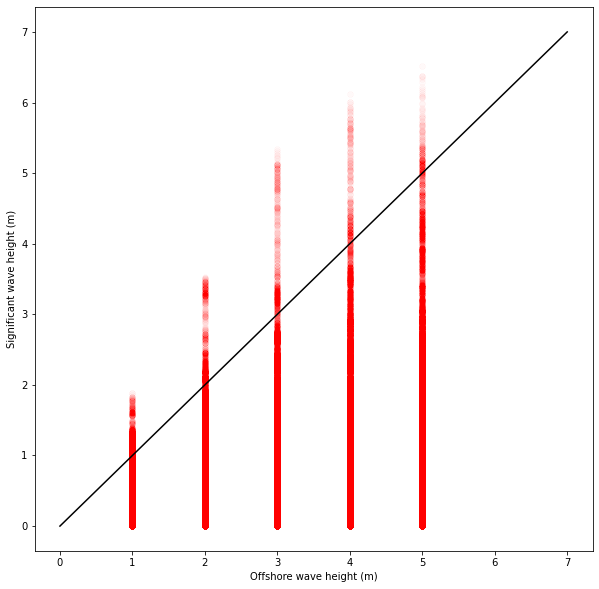

In [4]:
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((1,1),(0,0))

ax1.scatter(df_beware['H0'],df_beware['Hm0_SS'],alpha=0.005,c='r')
ax1.plot([0,7],[0,7],c='k')

ax1.set_ylabel('Significant wave height (m)')
ax1.set_xlabel('Offshore wave height (m)')

plt.show()

In [5]:
np.min(df_beware.beta_Beach)*180/math.pi

2.864788975654116

In [6]:
np.max(df_beware.beta_Beach)*180/math.pi

11.459155902616464

In [7]:
np.min(df_beware.beta_ForeReef)*180/math.pi

2.864788975654116

In [8]:
np.max(df_beware.beta_ForeReef)*180/math.pi

28.64788975654116

In [37]:
np.nanmedian(df_beware['Hm0_SS'])

0.40778956544802447

In [10]:
np

3.0

In [15]:
np.abs(np.min(df_beware.W_reef-389.26))

389.26

In [24]:
df_beware_filtered

eta0   H0   H0L0  beta_ForeReef  beta_Beach  W_reef  \
ID       numComponents                                                        
117273.0 1.0             1.0  1.0  0.050           0.05        0.20   400.0   
         2.0             1.0  1.0  0.050           0.05        0.20   400.0   
         3.0             1.0  1.0  0.050           0.05        0.20   400.0   
         4.0             1.0  1.0  0.050           0.05        0.20   400.0   
         5.0             1.0  1.0  0.050           0.05        0.20   400.0   
...                      ...  ...    ...            ...         ...     ...   
156812.0 2.0             1.0  5.0  0.005           0.05        0.05   400.0   
         3.0             1.0  5.0  0.005           0.05        0.05   400.0   
         4.0             1.0  5.0  0.005           0.05        0.05   400.0   
         5.0             1.0  5.0  0.005           0.05        0.05   400.0   
         6.0             1.0  5.0  0.005           0.05        0.05   400.0   

                          Cf  etaMean_innerReefFlat  etaMean_meanReefFlat  \
ID       numComponents                                                      
117273.0 1.0            0.01               1.032990              1.018951   
         2.0            0.01               1.032990              1.018951   
         3.0            0.01               1.032990              1.018951   
         4.0            0.01               1.032990              1.018951   
         5.0            0.01               1.032990              1.018951   
...                      ...                    ...                   ...   
156812.0 2.0            0.10               2.005279              1.924172   
         3.0            0.10               2.005279              1.924172   
         4.0            0.10               2.005279              1.924172   
         5.0            0.10               2.005279              1.924172   
         6.0            0.10               2.005279              1.924172   

                             Hm0   Hm0_VLF    Hm0_IG    Hm0_LF    Hm0_SS  \
ID       numComponents                                                     
117273.0 1.0            0.322696  0.033261  0.177167  0.180634  0.267426   
         2.0            0.322696  0.033261  0.177167  0.180634  0.267426   
         3.0            0.322696  0.033261  0.177167  0.180634  0.267426   
         4.0            0.322696  0.033261  0.177167  0.180634  0.267426   
         5.0            0.322696  0.033261  0.177167  0.180634  0.267426   
...                          ...       ...       ...       ...       ...   
156812.0 2.0            0.594543  0.443663  0.290036  0.523905  0.290808   
         3.0            0.594543  0.443663  0.290036  0.523905  0.290808   
         4.0            0.594543  0.443663  0.290036  0.523905  0.290808   
         5.0            0.594543  0.443663  0.290036  0.523905  0.290808   
         6.0            0.594543  0.443663  0.290036  0.523905  0.290808   

                             Tm1_0  R2pIndex  etaComponents  runupComponents  
ID       numComponents                                                        
117273.0 1.0             28.998099  1.352583       1.000000         1.000000  
         2.0             28.998099  1.352583       0.032990         0.067491  
         3.0             28.998099  1.352583       0.002984         0.002213  
         4.0             28.998099  1.352583       0.049490         0.040594  
         5.0             28.998099  1.352583       0.158159         0.292995  
...                            ...       ...            ...              ...  
156812.0 2.0            484.103124  2.474469       1.005279         1.050295  
         3.0            484.103124  2.474469       0.241636         0.280438  
         4.0            484.103124  2.474469       0.090377         0.211610  
         5.0            484.103124  2.474469       0.161012         0.012099  
         6.0            484.103124  2.474469       2.4983

In [25]:
5/0.005


1000.0